# 순환신경망(RNN) 기초

RNN의 API의 사용법과, input shape, output shape 등의 기본적인 것들에 대해서 알아봅니다.

In [1]:
## 라이브러리 임포트
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import numpy as np

import matplotlib.pyplot as plt
import os

print(tf.__version__)
print(keras.__version__)

2.4.1
2.4.0


## 단순 데이터 준비

In [2]:
# 'hello'의 각 문자를 원핫인코딩한다.
h = [1, 0, 0, 0]
e = [0, 1, 0, 0]
l = [0, 0, 1, 0]
o = [0, 0, 0, 1]


#SHAPE 는 3차원 -> 나중에 설명 



#[배치사이즈, 타임스텝, 특성수] = SHAPE

# 1. 일대일 RNN의 구현

![image](https://cloud.githubusercontent.com/assets/901975/23348727/cc981856-fce7-11e6-83ea-4b187473466b.png)

##  문제1: 은닉층 유닛을 2로 해서 위의 그래프를 구현해보라. 


In [6]:
### 힌트: SimpleRNN을 사용하고, units= hidden_size, return_sequences=True, return_state=True)로 설정해보라.

x_data = np.array([[h]], dtype=np.float32) #3차원으로 넣어주는느낌인데 
hidden_size = 2

###################################
rnn = layers.SimpleRNN(units=hidden_size,
                       return_sequences=True, #Y를 출력
                       
                      return_state=True) #h를 출력한다고 생각하면됨 
                                               #타임스텝마다 출력 (만약 False이면 마지막스텝에서만 출력)
                                              #배치끝의 state가 다음 배치의 초기값이 된다.(연결된다.)
##################################

outputs, states = rnn(x_data)

print('x_data: {}, shape: {}'.format(x_data, x_data.shape))
print('outputs: {}, shape: {}'.format(outputs, outputs.shape))
print('states: {}, shape: {}'.format(states, states.shape))

x_data: [[[1. 0. 0. 0.]]], shape: (1, 1, 4)
outputs: [[[ 0.34903887 -0.15128645]]], shape: (1, 1, 2)
states: [[ 0.34903887 -0.15128645]], shape: (1, 2)


## 2. 위의 RNN을 n 시퀀스로 펼쳐보자.

![image](https://cloud.githubusercontent.com/assets/901975/23383634/649efd0a-fd82-11e6-925d-8041242743b0.png)

# 문제2: 위의 그래프를 구현해보라.

In [17]:
# 여전히 One cell RNN을 사용한다. 단 sequence가 5가 된다. 
# input_dim (4) -> output_dim (2) 

x_data = np.array([[h, e, l, l, o]], dtype=np.float32)

hidden_size = 2

###################################
rnn = layers.SimpleRNN(units=hidden_size,
                       return_sequences=True, #맨마지막만 확인한다 감성분석에서 는(맨마지막에서 부정/긍정만 알면 되니까) 
                      return_state=True)


##################################


outputs, states = rnn(x_data)

print('x_data: {}, shape: {} \n'.format(x_data, x_data.shape))
print('outputs: {}, shape: {} \n'.format(outputs, outputs.shape))
print('states: {}, shape: {}'.format(states, states.shape))

x_data: [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]], shape: (1, 5, 4) 

outputs: [[[-0.10105684  0.11275206]
  [-0.14596152 -0.65182924]
  [-0.6445086  -0.31212163]
  [-0.76980144 -0.70142704]
  [-0.20041321 -0.2907023 ]]], shape: (1, 5, 2) 

states: [[-0.20041321 -0.2907023 ]], shape: (1, 2)


# 3.배치로 입력을 넣어보자.

![image](https://cloud.githubusercontent.com/assets/901975/23383681/9943a9fc-fd82-11e6-8121-bd187994e249.png)

# 문제3: 위의 그래프를 구현해보라.

In [18]:
# 여전히 One cell RNN을 사용한다. 이번에는 배치가 3이다. 
# input_dim (4) -> output_dim (2). sequence: 5, batch 3
# 3 배치는 다음으로 하자 (임의)
# 'hello', 'eolll', 'lleel'

x_data = np.array([[h, e, l, l, o],
                   [e, o, l, l, l],
                   [l, l, e, e, l]], dtype=np.float32)

hidden_size = 2

###################################
rnn = layers.SimpleRNN(units=hidden_size,
                       return_sequences=True, #맨마지막만 확인한다 감성분석에서 는(맨마지막에서 부정/긍정만 알면 되니까) 
                      return_state=True)

                                               #타임스텝마다 출력 (만약 False이면 마지막스텝에서만 출력)
                                                #배치끝의 state가 다음 배치의 초기값이 된다.(연결된다.)

##################################


outputs, states = rnn(x_data)

print('x_data: {}, shape: {} \n'.format(x_data, x_data.shape))
print('outputs: {}, shape: {} \n'.format(outputs, outputs.shape))
print('states: {}, shape: {}'.format(states, states.shape))

x_data: [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]

 [[0. 1. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]]

 [[0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]]], shape: (3, 5, 4) 

outputs: [[[-0.46046945  0.29253218]
  [ 0.82865864  0.24039048]
  [ 0.12389061 -0.4337275 ]
  [-0.54140073  0.17951208]
  [-0.6159027   0.1717368 ]]

 [[ 0.73097557 -0.23371951]
  [-0.77141535 -0.81067926]
  [-0.7843591   0.77873373]
  [ 0.48244768  0.82992357]
  [ 0.59350735 -0.07008938]]

 [[-0.18222232  0.3285373 ]
  [ 0.12718412  0.50069445]
  [ 0.89377654 -0.312226  ]
  [ 0.60079473 -0.81935966]
  [-0.7400352  -0.31491214]]], shape: (3, 5, 2) 

states: [[-0.6159027   0.1717368 ]
 [ 0.59350735 -0.07008938]
 [-0.7400352  -0.31491214]], shape: (3, 2)


# 4. No return sequences

### 문제4: return_sequences=False로 놓고 결과를 확인하라.

In [20]:
# return_sequences=False로 놓고 결과를 확인하라.

###################################
rnn = layers.SimpleRNN(units=hidden_size,
                       return_sequences=False, #맨마지막만 확인한다 감성분석에서 는(맨마지막에서 부정/긍정만 알면 되니까) 
                      return_state=True)




##################################


outputs, states = rnn(x_data)

print('x_data: {}, shape: {} \n'.format(x_data, x_data.shape))
print('outputs: {}, shape: {} \n'.format(outputs, outputs.shape))
print('states: {}, shape: {}'.format(states, states.shape))

x_data: [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]

 [[0. 1. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]]

 [[0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]]], shape: (3, 5, 4) 

outputs: [[-0.04490748 -0.8659714 ]
 [-0.10233384 -0.07788859]
 [ 0.08383857  0.79582644]], shape: (3, 2) 

states: [[-0.04490748 -0.8659714 ]
 [-0.10233384 -0.07788859]
 [ 0.08383857  0.79582644]], shape: (3, 2)


# 5. No return state
### 문제5: return_state=False도 추가하고 결과를 살펴보자.

In [21]:
# return_state=False도 추가하고 결과를 살펴보자.
###################################


rnn = layers.SimpleRNN(units=hidden_size,
                       return_sequences=True, #맨마지막만 확인한다 감성분석에서 는(맨마지막에서 부정/긍정만 알면 되니까) 
                      return_state=False)


##################################

outputs= rnn(x_data)  # state가 안 나온다.

print('x_data: {}, shape: {} \n'.format(x_data, x_data.shape))
print('outputs: {}, shape: {} \n'.format(outputs, outputs.shape))

x_data: [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]

 [[0. 1. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]]

 [[0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]]], shape: (3, 5, 4) 

outputs: [[[ 0.10742489  0.678025  ]
  [-0.6625324   0.31973064]
  [ 0.18291648  0.74391   ]
  [-0.10499724  0.05889348]
  [ 0.64715993  0.2798683 ]]

 [[-0.14260043  0.49362636]
  [ 0.3230159   0.25284776]
  [ 0.38105315 -0.00466668]
  [ 0.5814446  -0.02277865]
  [ 0.6126053  -0.21468098]]

 [[ 0.5384429   0.33912954]
  [ 0.33535242 -0.22671743]
  [ 0.1308414   0.23923117]
  [-0.34528148  0.3584213 ]
  [ 0.19266811  0.5647199 ]]], shape: (3, 5, 2) 



# 6. LSTM을 사용해보자.

### 문제6: LSTM을 구축해보라. LSTM의 출력은 outputs(출력), h_states(은닉상태), 그리고 c_states(셀상태)가 나온다.

In [23]:
###################################
rnn = layers.LSTM(units=hidden_size,
                       return_sequences=True, #맨마지막만 확인한다 감성분석에서 는(맨마지막에서 부정/긍정만 알면 되니까) 
                      return_state=True)




##################################

outputs, h_states, c_states = rnn(x_data)

print('x_data: {}, shape: {} \n'.format(x_data, x_data.shape))
print('outputs: {}, shape: {} \n'.format(outputs, outputs.shape))
print('hidden_states: {}, shape: {}'.format(h_states, h_states.shape))
print('cell_states: {}, shape: {}'.format(c_states, c_states.shape))

x_data: [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]

 [[0. 1. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]]

 [[0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]]], shape: (3, 5, 4) 

outputs: [[[ 0.11007303  0.10684668]
  [ 0.16989091  0.08585867]
  [ 0.06850144 -0.07506721]
  [ 0.00699338 -0.17498037]
  [ 0.12693018 -0.07026195]]

 [[ 0.12388863  0.01109275]
  [ 0.19808237  0.08857261]
  [ 0.05692577 -0.0688589 ]
  [-0.00143694 -0.17147994]
  [-0.02052414 -0.23681916]]

 [[-0.04966015 -0.12713404]
  [-0.05943194 -0.2098548 ]
  [ 0.1256395  -0.1526142 ]
  [ 0.217833   -0.09962058]
  [ 0.13826953 -0.18307571]]], shape: (3, 5, 2) 

hidden_states: [[ 0.12693018 -0.07026195]
 [-0.02052414 -0.23681916]
 [ 0.13826953 -0.18307571]], shape: (3, 2)
cell_states: [[ 0.1947487  -0.14312023]
 [-0.03234481 -0.5080329 ]
 [ 0.22157955 -0.38955173]], shape: (3, 2)


## 7. GRU와 비교해보자


### 문제7: GRU를 구축하라 GRU의 출력은 outputs(출력)과 state(은닉상태)이다. (굳이 cell state를 사용하지 않는다.)

In [24]:
###################################

rnn = layers.GRU(units=hidden_size,
                       return_sequences=True, #맨마지막만 확인한다 감성분석에서 는(맨마지막에서 부정/긍정만 알면 되니까) 
                      return_state=True)



##################################

outputs, states = rnn(x_data)

print('x_data: {}, shape: {} \n'.format(x_data, x_data.shape))
print('outputs: {}, shape: {} \n'.format(outputs, outputs.shape))
print('states: {}, shape: {}'.format(states, states.shape))

x_data: [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]

 [[0. 1. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]]

 [[0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]]], shape: (3, 5, 4) 

outputs: [[[-2.6092044e-01 -5.7257183e-02]
  [ 4.2914443e-02  2.7631456e-01]
  [ 2.9132295e-01 -9.7834781e-02]
  [ 4.5939004e-01 -2.1158013e-01]
  [ 7.4231178e-02 -6.9040865e-02]]

 [[ 1.4838526e-01  3.1080630e-01]
  [-9.2150182e-02  2.7746454e-02]
  [ 2.5294542e-01 -2.2230950e-01]
  [ 4.5237955e-01 -2.7117115e-01]
  [ 5.4919600e-01 -2.6676717e-01]]

 [[ 3.0396560e-01 -2.1730942e-01]
  [ 4.7607481e-01 -2.6190579e-01]
  [ 3.5385573e-01  1.7832965e-01]
  [ 2.8584704e-01  4.0316021e-01]
  [ 4.0542948e-01 -3.0557811e-04]]], shape: (3, 5, 2) 

states: [[ 7.4231178e-02 -6.9040865e-02]
 [ 5.4919600e-01 -2.6676717e-01]
 [ 4.0542948e-01 -3.0557811e-04]], shape: (3, 2)


# 8.RNN을 적층으로 쌓아보자 (Stacked RNN)

#### 문제8. LSTM을 3개층을 쌓아보라

In [41]:
###################################


model = keras.Sequential()
model.add(layers.LSTM(2,return_sequences=True,input_shape=(5,4)))
model.add(layers.LSTM(2,return_sequences=True))
model.add(layers.LSTM(2,return_sequences=True))
#model.add(layers.Dense())
#model.add(layers.Softmax())
##################################

model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_31 (LSTM)               (None, 5, 2)              56        
_________________________________________________________________
lstm_32 (LSTM)               (None, 5, 2)              40        
_________________________________________________________________
lstm_33 (LSTM)               (None, 5, 2)              40        
Total params: 136
Trainable params: 136
Non-trainable params: 0
_________________________________________________________________


# [실습1] RNN을 이용하여 MNIST Classification 학습하기 
  

MNIST Image를 한 line씩 RNN에 입력하여 classification을 하는 실습을 해보겠습니다.

In [42]:
## 하이퍼 파라미터
learning_rate = 0.001
training_epochs = 15
batch_size = 100
n_class = 10

In [43]:
## Data 준비
## MNIST Dataset #########################################################
mnist = keras.datasets.mnist
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
##########################################################################

## Fashion MNIST Dataset #################################################
#mnist = keras.datasets.fashion_mnist
#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
##########################################################################

In [44]:
## Dataset 만들기
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

n_train = train_images.shape[0]
n_test = test_images.shape[0]
print(train_images.shape, test_images.shape)

(60000, 28, 28) (10000, 28, 28)


In [45]:
# pixel값을 0~1사이 범위로 조정
train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.

# label을 onehot-encoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)    

# Dataset 구성
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(
                buffer_size=100000).batch(batch_size).repeat()
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(batch_size).repeat()

### 문제9: LSTM 모델을 구축해보라. (LSTM -> Dense를 쌓고 softmax를 사용해보라.)

In [60]:
train_dataset

<RepeatDataset shapes: ((None, 28, 28), (None, 10)), types: (tf.float32, tf.float32)>

In [65]:
## Model 만들기 (아리 서머리 참조)
def create_model():
    model = keras.Sequential()
    model.add(layers.LSTM(units=128,return_sequences=False,input_shape=(28,28)))
    model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
    return model

In [66]:
model = create_model()
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_35 (LSTM)               (None, 128)               80384     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 81,674
Trainable params: 81,674
Non-trainable params: 0
_________________________________________________________________


In [67]:
## 모델 컴파일
model.compile(optimizer=keras.optimizers.Adam(learning_rate),
              loss='categorical_crossentropy',#원핫인코딩했기때문에 카테고리칼
              metrics=['accuracy'])

In [74]:
## 적합화를 위한 준비
steps_per_epoch = n_train/batch_size/100
validation_steps = n_test/batch_size/100

In [76]:
## 모델 적합화
history = model.fit(train_dataset, epochs=training_epochs, steps_per_epoch=steps_per_epoch/10, 
                    validation_data=test_dataset, validation_steps=validation_steps)

Epoch 1/500
2/2 [==============================] - 0s 142ms/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 0.0125 - val_accuracy: 0.9975
Epoch 2/500
2/2 [==============================] - 0s 144ms/step - loss: 0.0261 - accuracy: 0.9900 - val_loss: 0.0158 - val_accuracy: 0.9975
Epoch 3/500
2/2 [==============================] - 0s 162ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.0207 - val_accuracy: 0.9950
Epoch 4/500
2/2 [==============================] - 0s 184ms/step - loss: 0.0092 - accuracy: 0.9967 - val_loss: 0.0248 - val_accuracy: 0.9925
Epoch 5/500
2/2 [==============================] - 0s 156ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0305 - val_accuracy: 0.9875
Epoch 6/500
2/2 [==============================] - 0s 167ms/step - loss: 0.0494 - accuracy: 0.9867 - val_loss: 0.0269 - val_accuracy: 0.9925
Epoch 7/500
2/2 [==============================] - 0s 154ms/step - loss: 0.0134 - accuracy: 0.9967 - val_loss: 0.0287 - val_accuracy: 0.9925
Epoch 8/500
2

Epoch 59/500
2/2 [==============================] - 0s 156ms/step - loss: 0.0390 - accuracy: 0.9900 - val_loss: 0.0322 - val_accuracy: 0.9850
Epoch 60/500
2/2 [==============================] - 0s 227ms/step - loss: 0.0131 - accuracy: 0.9967 - val_loss: 0.0326 - val_accuracy: 0.9825
Epoch 61/500
2/2 [==============================] - 0s 294ms/step - loss: 0.0149 - accuracy: 0.9900 - val_loss: 0.0291 - val_accuracy: 0.9875
Epoch 62/500
2/2 [==============================] - 1s 296ms/step - loss: 0.0178 - accuracy: 0.9933 - val_loss: 0.0253 - val_accuracy: 0.9900
Epoch 63/500
2/2 [==============================] - 0s 189ms/step - loss: 0.0147 - accuracy: 0.9933 - val_loss: 0.0248 - val_accuracy: 0.9925
Epoch 64/500
2/2 [==============================] - 0s 190ms/step - loss: 0.0173 - accuracy: 0.9933 - val_loss: 0.0273 - val_accuracy: 0.9925
Epoch 65/500
2/2 [==============================] - 0s 256ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0315 - val_accuracy: 0.9925
Epoch 

2/2 [==============================] - 0s 178ms/step - loss: 0.0092 - accuracy: 0.9933 - val_loss: 0.0455 - val_accuracy: 0.9850
Epoch 117/500
2/2 [==============================] - 0s 172ms/step - loss: 0.0296 - accuracy: 0.9933 - val_loss: 0.0432 - val_accuracy: 0.9875
Epoch 118/500
2/2 [==============================] - 0s 165ms/step - loss: 0.0077 - accuracy: 0.9967 - val_loss: 0.0415 - val_accuracy: 0.9875
Epoch 119/500
2/2 [==============================] - 0s 159ms/step - loss: 0.0083 - accuracy: 0.9967 - val_loss: 0.0414 - val_accuracy: 0.9875
Epoch 120/500
2/2 [==============================] - 0s 160ms/step - loss: 0.0077 - accuracy: 0.9967 - val_loss: 0.0423 - val_accuracy: 0.9850
Epoch 121/500
2/2 [==============================] - 0s 157ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.0428 - val_accuracy: 0.9875
Epoch 122/500
2/2 [==============================] - 0s 181ms/step - loss: 0.0114 - accuracy: 0.9967 - val_loss: 0.0390 - val_accuracy: 0.9875
Epoch 123/500

2/2 [==============================] - 0s 158ms/step - loss: 0.0104 - accuracy: 0.9967 - val_loss: 0.0210 - val_accuracy: 0.9900
Epoch 174/500
2/2 [==============================] - 0s 150ms/step - loss: 0.0186 - accuracy: 0.9933 - val_loss: 0.0190 - val_accuracy: 0.9900
Epoch 175/500
2/2 [==============================] - 0s 153ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0164 - val_accuracy: 0.9950
Epoch 176/500
2/2 [==============================] - 0s 148ms/step - loss: 0.0059 - accuracy: 0.9967 - val_loss: 0.0156 - val_accuracy: 0.9950
Epoch 177/500
2/2 [==============================] - 0s 150ms/step - loss: 0.0208 - accuracy: 0.9967 - val_loss: 0.0165 - val_accuracy: 0.9925
Epoch 178/500
2/2 [==============================] - 0s 155ms/step - loss: 0.0094 - accuracy: 0.9967 - val_loss: 0.0183 - val_accuracy: 0.9925
Epoch 179/500
2/2 [==============================] - 0s 149ms/step - loss: 6.8695e-04 - accuracy: 1.0000 - val_loss: 0.0202 - val_accuracy: 0.9925
Epoch 180

2/2 [==============================] - 0s 182ms/step - loss: 0.0211 - accuracy: 0.9967 - val_loss: 0.0355 - val_accuracy: 0.9875
Epoch 231/500
2/2 [==============================] - 0s 200ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0339 - val_accuracy: 0.9875
Epoch 232/500
2/2 [==============================] - 0s 167ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0306 - val_accuracy: 0.9875
Epoch 233/500
2/2 [==============================] - 0s 169ms/step - loss: 0.0077 - accuracy: 0.9967 - val_loss: 0.0286 - val_accuracy: 0.9900
Epoch 234/500
2/2 [==============================] - 0s 182ms/step - loss: 0.0123 - accuracy: 0.9967 - val_loss: 0.0280 - val_accuracy: 0.9900
Epoch 235/500
2/2 [==============================] - 0s 162ms/step - loss: 0.0113 - accuracy: 0.9933 - val_loss: 0.0319 - val_accuracy: 0.9875
Epoch 236/500
2/2 [==============================] - 0s 159ms/step - loss: 0.0069 - accuracy: 0.9967 - val_loss: 0.0369 - val_accuracy: 0.9850
Epoch 237/500

2/2 [==============================] - 1s 513ms/step - loss: 0.0293 - accuracy: 0.9900 - val_loss: 0.0431 - val_accuracy: 0.9900
Epoch 288/500
2/2 [==============================] - 0s 204ms/step - loss: 0.0201 - accuracy: 0.9900 - val_loss: 0.0408 - val_accuracy: 0.9900
Epoch 289/500
2/2 [==============================] - 0s 187ms/step - loss: 0.0181 - accuracy: 0.9933 - val_loss: 0.0506 - val_accuracy: 0.9900
Epoch 290/500
2/2 [==============================] - 0s 244ms/step - loss: 0.0068 - accuracy: 0.9933 - val_loss: 0.0548 - val_accuracy: 0.9900
Epoch 291/500
2/2 [==============================] - 1s 412ms/step - loss: 0.0074 - accuracy: 0.9967 - val_loss: 0.0587 - val_accuracy: 0.9875
Epoch 292/500
2/2 [==============================] - 0s 273ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0625 - val_accuracy: 0.9875
Epoch 293/500
2/2 [==============================] - 0s 287ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0679 - val_accuracy: 0.9825
Epoch 294/500

2/2 [==============================] - 0s 266ms/step - loss: 0.0247 - accuracy: 0.9967 - val_loss: 0.0513 - val_accuracy: 0.9850
Epoch 345/500
2/2 [==============================] - 0s 192ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0544 - val_accuracy: 0.9825
Epoch 346/500
2/2 [==============================] - 0s 189ms/step - loss: 0.0403 - accuracy: 0.9867 - val_loss: 0.0522 - val_accuracy: 0.9850
Epoch 347/500
2/2 [==============================] - 0s 182ms/step - loss: 0.0239 - accuracy: 0.9933 - val_loss: 0.0497 - val_accuracy: 0.9875
Epoch 348/500
2/2 [==============================] - 0s 265ms/step - loss: 0.0092 - accuracy: 0.9967 - val_loss: 0.0478 - val_accuracy: 0.9900
Epoch 349/500
2/2 [==============================] - 0s 286ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.0471 - val_accuracy: 0.9900
Epoch 350/500
2/2 [==============================] - 0s 219ms/step - loss: 0.0103 - accuracy: 0.9967 - val_loss: 0.0474 - val_accuracy: 0.9900
Epoch 351/500

2/2 [==============================] - 1s 181ms/step - loss: 0.0188 - accuracy: 0.9933 - val_loss: 0.0517 - val_accuracy: 0.9800
Epoch 402/500
2/2 [==============================] - 0s 174ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0567 - val_accuracy: 0.9800
Epoch 403/500
2/2 [==============================] - 0s 199ms/step - loss: 0.0262 - accuracy: 0.9933 - val_loss: 0.0533 - val_accuracy: 0.9775
Epoch 404/500
2/2 [==============================] - 1s 353ms/step - loss: 0.0235 - accuracy: 0.9900 - val_loss: 0.0441 - val_accuracy: 0.9850
Epoch 405/500
2/2 [==============================] - 0s 217ms/step - loss: 0.0035 - accuracy: 0.9967 - val_loss: 0.0442 - val_accuracy: 0.9850
Epoch 406/500
2/2 [==============================] - 0s 197ms/step - loss: 0.0055 - accuracy: 0.9967 - val_loss: 0.0469 - val_accuracy: 0.9850
Epoch 407/500
2/2 [==============================] - 1s 383ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0482 - val_accuracy: 0.9850
Epoch 408/500

2/2 [==============================] - 0s 258ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.0386 - val_accuracy: 0.9875
Epoch 459/500
2/2 [==============================] - 1s 491ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.0354 - val_accuracy: 0.9875
Epoch 460/500
2/2 [==============================] - 0s 271ms/step - loss: 0.0144 - accuracy: 0.9933 - val_loss: 0.0288 - val_accuracy: 0.9900
Epoch 461/500
2/2 [==============================] - 1s 325ms/step - loss: 0.0134 - accuracy: 0.9933 - val_loss: 0.0252 - val_accuracy: 0.9900
Epoch 462/500
2/2 [==============================] - 0s 289ms/step - loss: 0.0121 - accuracy: 0.9967 - val_loss: 0.0240 - val_accuracy: 0.9875
Epoch 463/500
2/2 [==============================] - 0s 251ms/step - loss: 0.0041 - accuracy: 0.9967 - val_loss: 0.0264 - val_accuracy: 0.9875
Epoch 464/500
2/2 [==============================] - 0s 289ms/step - loss: 0.0092 - accuracy: 0.9933 - val_loss: 0.0299 - val_accuracy: 0.9825
Epoch 465/500

In [77]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img,cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    #plt.xticks([])
    plt.xticks(range(n_class), class_names, rotation=90)
    plt.yticks([])
    thisplot = plt.bar(range(n_class), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

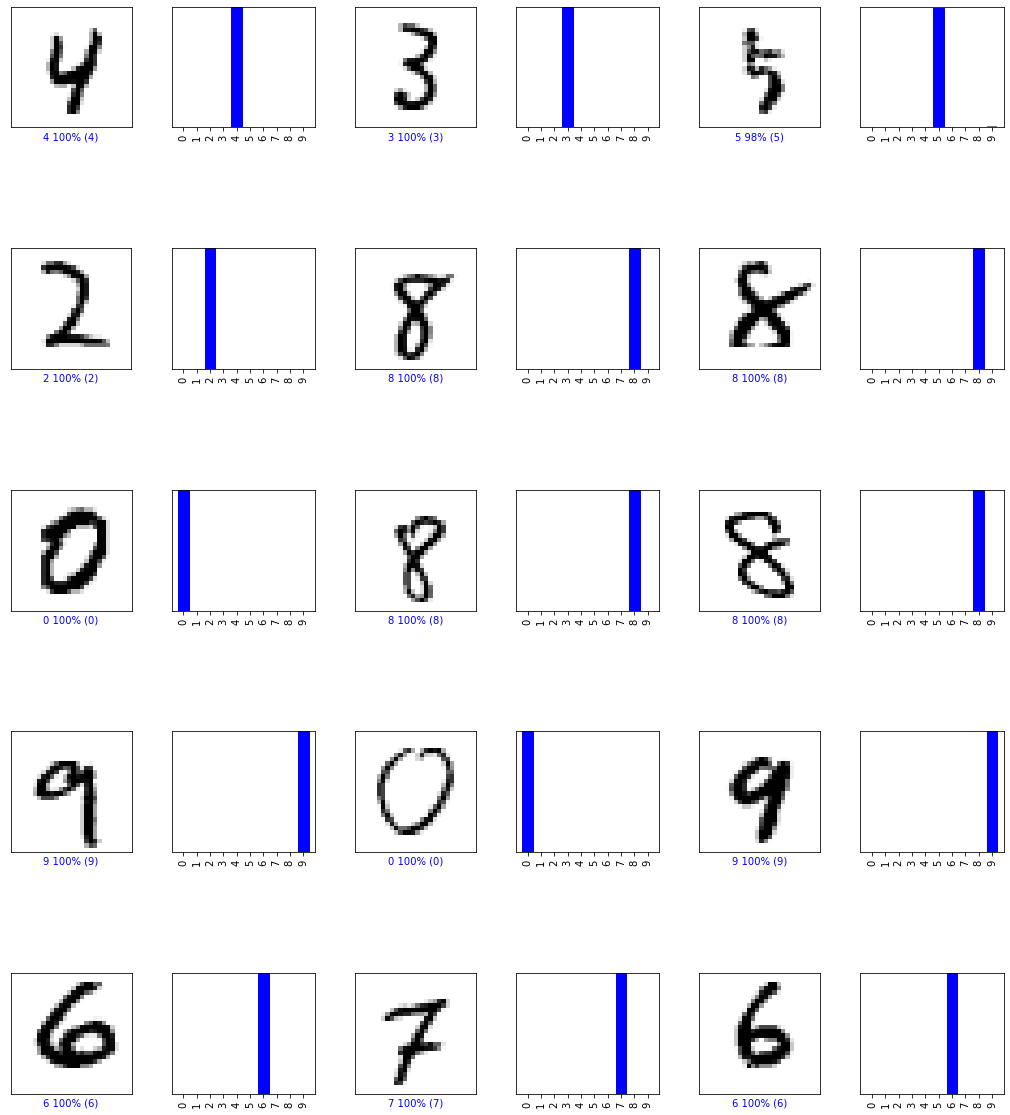

In [78]:
rnd_idx = np.random.randint(1, n_test//batch_size)
img_cnt = 0
for images, labels in test_dataset:
    img_cnt += 1
    if img_cnt != rnd_idx:
        continue
    predictions = model(images, training=False)
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    labels = tf.argmax(labels, axis=-1)
    plt.figure(figsize=(3*2*num_cols, 4*num_rows))
    plt.subplots_adjust(hspace=1.0)
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions.numpy(), labels.numpy(), images.numpy())
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions.numpy(), labels.numpy())        
    break

# [실습2] Stock Prediction with RNN  
### RNN을 이용한 간단한 주식 예측 모델을 학습해보겠습니다.

In [80]:
## 하이퍼 파라미터
seq_length = 7 #일주일 (TIME STEMP)
data_dim = 5
hidden_size = 10
output_dim = 1
learning_rate = 0.001
training_epochs = 500
batch_size = 25

In [81]:
## 데이터 전처리
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

In [82]:
# ## Google Drive 동기화
# from google.colab import drive
# drive.mount('/content/drive')

In [83]:
## 데이타 로딩
# 시가, 고가, 저가, 거래량, 종가의 순으로 데이터가 저장돼있다.
xy = np.loadtxt('data_in/data/data-02-stock_daily.csv', delimiter=',')
xy = xy[::-1]  # 데이터를 보면 날짜 순서가 거꾸로 돼있어 바로 잡는다.
xy = MinMaxScaler(xy).astype(np.float32) # 정규화하고,
x = xy           # 일단 모든 데이터를 다 사용하는데.
y = xy[:, [-1]]  # 종가를 레이블로 만든다.

In [84]:
# 데이터 구축  (LSTM에서가장 중요한 부분 중 하나)
dataX = []
dataY = []
for i in range(0, len(y) - seq_length):
    _x = x[i:i + seq_length]
    _y = y[i + seq_length]  # 다음날의 종가
    dataX.append(_x)
    dataY.append(_y)

In [85]:
print(np.array(dataX).shape)  #(배치크기, 타임스텝크기 특성수) 여기서 타임스텝은 7이고, 특성수는 시/고저/거래량/종가의 5개다.
print(np.array(dataY).shape)

(725, 7, 5)
(725, 1)


In [86]:
## 훈련/테스트셋 분리
train_size = int(len(dataY) * 0.7 + 18)
test_size = len(dataY) - train_size
trainX, testX = np.array(dataX[0:train_size]), np.array(
    dataX[train_size:len(dataX)])
trainY, testY = np.array(dataY[0:train_size]), np.array(
    dataY[train_size:len(dataY)])
print(trainX.shape, trainY.shape)
print(testX.shape, testY.shape)

(525, 7, 5) (525, 1)
(200, 7, 5) (200, 1)


In [87]:
## 데이터셋을 만들자
train_dataset = tf.data.Dataset.from_tensor_slices((trainX, trainY)).shuffle(
                buffer_size=1000).prefetch(buffer_size=batch_size).batch(batch_size).repeat()
test_dataset = tf.data.Dataset.from_tensor_slices((testX, testY)).prefetch(
                buffer_size=batch_size).batch(batch_size)

# 문제10: 2층 LSTM 모델을 만들어보자  2층 LSTM -> Dense로 구축해보자.

In [117]:
## 모델을 만들자.
## 상기: hidden_size = 10, output_dim = 1
## trainX.shape = (525, 7, 5)

def create_model():
    model = keras.Sequential()
    model.add(layers.LSTM(units=10,return_sequences=True,input_shape=(7,5)))
    model.add(layers.LSTM(units=10,return_sequences=False))
    model.add(tf.keras.layers.Dense(units=1)) #soft max는 확률 보고 싶을때
    return model

In [118]:
model = create_model()
model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_46 (LSTM)               (None, 7, 10)             640       
_________________________________________________________________
lstm_47 (LSTM)               (None, 10)                840       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 1,491
Trainable params: 1,491
Non-trainable params: 0
_________________________________________________________________


In [119]:
## 손실함수와 최적화 정의
def rmse_opt(learning_rate):
    return keras.optimizers.RMSprop(learning_rate)

model.compile(optimizer=rmse_opt(learning_rate),
              loss='mse',
              metrics=[keras.metrics.RootMeanSquaredError()])  

In [120]:
## 적합화
model.fit(train_dataset, epochs=training_epochs,
          steps_per_epoch=trainX.shape[0]//batch_size,
          validation_data=test_dataset,
          validation_steps=testX.shape[0]//batch_size)

Epoch 1/500
21/21 [==============================] - 4s 46ms/step - loss: 0.0951 - root_mean_squared_error: 0.3055 - val_loss: 0.0786 - val_root_mean_squared_error: 0.2804
Epoch 2/500
21/21 [==============================] - 0s 12ms/step - loss: 0.0125 - root_mean_squared_error: 0.1114 - val_loss: 0.0140 - val_root_mean_squared_error: 0.1185
Epoch 3/500
21/21 [==============================] - 0s 14ms/step - loss: 0.0042 - root_mean_squared_error: 0.0646 - val_loss: 0.0061 - val_root_mean_squared_error: 0.0780
Epoch 4/500
21/21 [==============================] - 0s 9ms/step - loss: 0.0034 - root_mean_squared_error: 0.0579 - val_loss: 0.0052 - val_root_mean_squared_error: 0.0720
Epoch 5/500
21/21 [==============================] - 0s 10ms/step - loss: 0.0031 - root_mean_squared_error: 0.0556 - val_loss: 0.0018 - val_root_mean_squared_error: 0.0428
Epoch 6/500
21/21 [==============================] - 0s 10ms/step - loss: 0.0038 - root_mean_squared_error: 0.0614 - val_loss: 0.0024 - val_r

21/21 [==============================] - 0s 9ms/step - loss: 0.0024 - root_mean_squared_error: 0.0480 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0343
Epoch 49/500
21/21 [==============================] - 0s 9ms/step - loss: 0.0025 - root_mean_squared_error: 0.0491 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0432
Epoch 50/500
21/21 [==============================] - 0s 10ms/step - loss: 0.0014 - root_mean_squared_error: 0.0379 - val_loss: 0.0057 - val_root_mean_squared_error: 0.0756
Epoch 51/500
21/21 [==============================] - 0s 9ms/step - loss: 0.0017 - root_mean_squared_error: 0.0413 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0334
Epoch 52/500
21/21 [==============================] - 0s 9ms/step - loss: 0.0015 - root_mean_squared_error: 0.0380 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0519
Epoch 53/500
21/21 [==============================] - 0s 10ms/step - loss: 0.0015 - root_mean_squared_error: 0.0387 - val_loss: 0.0026 - val_root_mean_s

21/21 [==============================] - 0s 10ms/step - loss: 0.0011 - root_mean_squared_error: 0.0333 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0333
Epoch 96/500
21/21 [==============================] - 0s 11ms/step - loss: 0.0015 - root_mean_squared_error: 0.0377 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0347
Epoch 97/500
21/21 [==============================] - 0s 9ms/step - loss: 0.0015 - root_mean_squared_error: 0.0382 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0416
Epoch 98/500
21/21 [==============================] - 0s 8ms/step - loss: 0.0011 - root_mean_squared_error: 0.0324 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0372
Epoch 99/500
21/21 [==============================] - 0s 8ms/step - loss: 0.0010 - root_mean_squared_error: 0.0322 - val_loss: 9.6680e-04 - val_root_mean_squared_error: 0.0311
Epoch 100/500
21/21 [==============================] - 0s 8ms/step - loss: 0.0013 - root_mean_squared_error: 0.0355 - val_loss: 9.5917e-04 - val_ro

21/21 [==============================] - 0s 20ms/step - loss: 9.2868e-04 - root_mean_squared_error: 0.0304 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0356
Epoch 142/500
21/21 [==============================] - 0s 12ms/step - loss: 8.5580e-04 - root_mean_squared_error: 0.0291 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0498
Epoch 143/500
21/21 [==============================] - 0s 13ms/step - loss: 9.7591e-04 - root_mean_squared_error: 0.0311 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0323
Epoch 144/500
21/21 [==============================] - 0s 11ms/step - loss: 8.8898e-04 - root_mean_squared_error: 0.0298 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0413
Epoch 145/500
21/21 [==============================] - 0s 19ms/step - loss: 8.5384e-04 - root_mean_squared_error: 0.0291 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0440
Epoch 146/500
21/21 [==============================] - 0s 13ms/step - loss: 9.1240e-04 - root_mean_squared_error: 0.0302 - v

21/21 [==============================] - 0s 12ms/step - loss: 9.3570e-04 - root_mean_squared_error: 0.0305 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0364
Epoch 188/500
21/21 [==============================] - 0s 13ms/step - loss: 8.2068e-04 - root_mean_squared_error: 0.0286 - val_loss: 8.4053e-04 - val_root_mean_squared_error: 0.0290
Epoch 189/500
21/21 [==============================] - 0s 10ms/step - loss: 7.9739e-04 - root_mean_squared_error: 0.0282 - val_loss: 8.2523e-04 - val_root_mean_squared_error: 0.0287
Epoch 190/500
21/21 [==============================] - 0s 10ms/step - loss: 9.5777e-04 - root_mean_squared_error: 0.0309 - val_loss: 9.0520e-04 - val_root_mean_squared_error: 0.0301
Epoch 191/500
21/21 [==============================] - 0s 9ms/step - loss: 7.4468e-04 - root_mean_squared_error: 0.0272 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0475
Epoch 192/500
21/21 [==============================] - 0s 9ms/step - loss: 7.4489e-04 - root_mean_squared_error: 

21/21 [==============================] - 0s 9ms/step - loss: 7.9673e-04 - root_mean_squared_error: 0.0281 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0361
Epoch 233/500
21/21 [==============================] - 0s 11ms/step - loss: 8.6475e-04 - root_mean_squared_error: 0.0294 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0377
Epoch 234/500
21/21 [==============================] - 0s 9ms/step - loss: 0.0010 - root_mean_squared_error: 0.0315 - val_loss: 9.2993e-04 - val_root_mean_squared_error: 0.0305
Epoch 235/500
21/21 [==============================] - 0s 9ms/step - loss: 9.0342e-04 - root_mean_squared_error: 0.0300 - val_loss: 7.0365e-04 - val_root_mean_squared_error: 0.0265
Epoch 236/500
21/21 [==============================] - 0s 9ms/step - loss: 6.8861e-04 - root_mean_squared_error: 0.0261 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0364
Epoch 237/500
21/21 [==============================] - 0s 9ms/step - loss: 8.7936e-04 - root_mean_squared_error: 0.0296 - va

21/21 [==============================] - 0s 8ms/step - loss: 8.8341e-04 - root_mean_squared_error: 0.0296 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0337
Epoch 279/500
21/21 [==============================] - 0s 8ms/step - loss: 9.7214e-04 - root_mean_squared_error: 0.0310 - val_loss: 8.3427e-04 - val_root_mean_squared_error: 0.0289
Epoch 280/500
21/21 [==============================] - 0s 8ms/step - loss: 7.3650e-04 - root_mean_squared_error: 0.0271 - val_loss: 9.6903e-04 - val_root_mean_squared_error: 0.0311
Epoch 281/500
21/21 [==============================] - 0s 8ms/step - loss: 8.4381e-04 - root_mean_squared_error: 0.0290 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0371
Epoch 282/500
21/21 [==============================] - 0s 7ms/step - loss: 9.2176e-04 - root_mean_squared_error: 0.0303 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0347
Epoch 283/500
21/21 [==============================] - 0s 8ms/step - loss: 8.5199e-04 - root_mean_squared_error: 0.0291 -

21/21 [==============================] - 0s 16ms/step - loss: 0.0010 - root_mean_squared_error: 0.0322 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0360
Epoch 325/500
21/21 [==============================] - 0s 8ms/step - loss: 7.1895e-04 - root_mean_squared_error: 0.0267 - val_loss: 9.7648e-04 - val_root_mean_squared_error: 0.0312
Epoch 326/500
21/21 [==============================] - 0s 8ms/step - loss: 7.2954e-04 - root_mean_squared_error: 0.0269 - val_loss: 8.8737e-04 - val_root_mean_squared_error: 0.0298
Epoch 327/500
21/21 [==============================] - 0s 14ms/step - loss: 6.9480e-04 - root_mean_squared_error: 0.0263 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0321
Epoch 328/500
21/21 [==============================] - 0s 16ms/step - loss: 7.5146e-04 - root_mean_squared_error: 0.0273 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0349
Epoch 329/500
21/21 [==============================] - 0s 16ms/step - loss: 9.4594e-04 - root_mean_squared_error: 0.0306 -

21/21 [==============================] - 1s 46ms/step - loss: 0.0010 - root_mean_squared_error: 0.0319 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0392
Epoch 371/500
21/21 [==============================] - 1s 31ms/step - loss: 7.4946e-04 - root_mean_squared_error: 0.0273 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0321
Epoch 372/500
21/21 [==============================] - 0s 13ms/step - loss: 7.5497e-04 - root_mean_squared_error: 0.0274 - val_loss: 8.1751e-04 - val_root_mean_squared_error: 0.0286
Epoch 373/500
21/21 [==============================] - 0s 20ms/step - loss: 9.3583e-04 - root_mean_squared_error: 0.0305 - val_loss: 9.6286e-04 - val_root_mean_squared_error: 0.0310
Epoch 374/500
21/21 [==============================] - 0s 11ms/step - loss: 8.6163e-04 - root_mean_squared_error: 0.0293 - val_loss: 0.0018 - val_root_mean_squared_error: 0.0429
Epoch 375/500
21/21 [==============================] - 1s 25ms/step - loss: 8.6678e-04 - root_mean_squared_error: 0.0294

21/21 [==============================] - 1s 34ms/step - loss: 7.4442e-04 - root_mean_squared_error: 0.0273 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0372
Epoch 417/500
21/21 [==============================] - 1s 29ms/step - loss: 8.6542e-04 - root_mean_squared_error: 0.0293 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0380
Epoch 418/500
21/21 [==============================] - 0s 24ms/step - loss: 7.6281e-04 - root_mean_squared_error: 0.0276 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0441
Epoch 419/500
21/21 [==============================] - 0s 18ms/step - loss: 7.8041e-04 - root_mean_squared_error: 0.0279 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0372
Epoch 420/500
21/21 [==============================] - 0s 17ms/step - loss: 6.7619e-04 - root_mean_squared_error: 0.0260 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0360
Epoch 421/500
21/21 [==============================] - 0s 13ms/step - loss: 7.2687e-04 - root_mean_squared_error: 0.0269 - v

21/21 [==============================] - 0s 10ms/step - loss: 6.7155e-04 - root_mean_squared_error: 0.0258 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0371
Epoch 463/500
21/21 [==============================] - 0s 9ms/step - loss: 7.2219e-04 - root_mean_squared_error: 0.0268 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0466
Epoch 464/500
21/21 [==============================] - 0s 11ms/step - loss: 6.6045e-04 - root_mean_squared_error: 0.0256 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0455
Epoch 465/500
21/21 [==============================] - 0s 11ms/step - loss: 8.6265e-04 - root_mean_squared_error: 0.0293 - val_loss: 0.0018 - val_root_mean_squared_error: 0.0420
Epoch 466/500
21/21 [==============================] - 0s 11ms/step - loss: 7.1798e-04 - root_mean_squared_error: 0.0268 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0481
Epoch 467/500
21/21 [==============================] - 0s 11ms/step - loss: 7.7765e-04 - root_mean_squared_error: 0.0278 - va

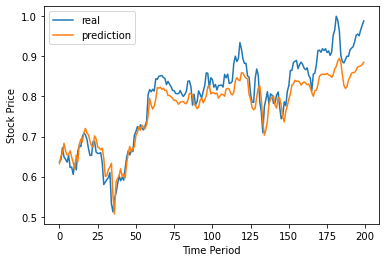

In [121]:
## 결과 확인
prediction = model.predict(test_dataset)

plt.plot(testY)
plt.plot(prediction)
plt.xlabel("Time Period")
plt.ylabel("Stock Price")
plt.legend(['real', 'prediction'])
plt.show()